In [98]:
print("Hello World")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

df = pd.read_csv("data/YargaitGH-Ashley-Humid-Solar-Data-May.csv")

# df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
# df = df.set_index('Datetime')
# #And to get rid of unwanted columns (as OP did but did not specify per se in the question):
# df = df.drop(['date','time'], axis=1)

df['sensorTime'] = df["MeasureDate"] + " " + df['MeasureTime']
df["sensorTime"] = pd.to_datetime(df["sensorTime"], format="%m/%d/%Y %H:%M:%S")
# Measure Date
# df = df.loc[(df["sensorTime"] >= '2023-05-02 00:00:00') & (df["sensorTime"] <= '2023-05-03 00:00:00')]
df

Hello World


,MeasureDate,MeasureTime,SunRadiation1,Temp1,RH1,Temp2,RH2,SunRadiotion2,sensorTime
0,4/30/2023,17:59:00,0.19,17.7,96.5,NaN,NaN,-0.03,2023-04-30 17:59:00
1,4/30/2023,18:00:00,0.17,17.7,96.8,21.8,66.5,0.44,2023-04-30 18:00:00
2,4/30/2023,18:01:00,0.19,17.7,96.9,21.7,66.5,1.85,2023-04-30 18:01:00
3,4/30/2023,18:02:00,0.18,17.7,97.0,21.6,67.6,1.82,2023-04-30 18:02:00
4,4/30/2023,18:03:00,0.18,17.7,97.0,21.5,67.2,1.82,2023-04-30 18:03:00
...,...,...,...,...,...,...,...,...,...
8571,5/6/2023,16:50:00,0.82,17.8,97.1,21.8,61.3,7.08,2023-05-06 16:50:00
8572,5/6/2023,16:51:00,0.80,17.8,97.1,21.8,62.2,6.93,2023-05-06 16:51:00
8573,5/6/2023,16:52:00,0.78,17.8,96.7,21.8,61.6,6.76,2023-05-06 16:52:00
8574,5/6/2023,16:53:00,0.75,17.8,96.6,21.7,61.4,6.53,2023-05-06 16:53:00


In [ ]:
sns.distplot(df['RH1'], hist=True)

In [ ]:
# December data

nov8 = pd.read_csv("data/YargaitGH-Uwall-20221206.csv")
# nov8["MeasureTime"] = pd.to_datetime(nov8["MeasureTime"], format="%m/%d/%Y %H:%M")
# nov8 = nov8.iloc[df['MeasureTime'] > '2022-11-10 12:00:00']
# jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (df["MeasureTime"] <= '2023-01-12 00:00')]
nov8

In [68]:
# December-January data

dec6Jan = pd.read_csv("data/Yargait-20221206-20230101.csv")
dec6Jan["MeasureTime"] = pd.to_datetime(dec6Jan["MeasureTime"], format="%m/%d/%Y %H:%M")
# nov8 = nov8.iloc[df['MeasureTime'] > '2022-11-10 12:00:00']
# jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (df["MeasureTime"] <= '2023-01-12 00:00')]
dec6Jan

,MeasureTime,Fan-1,Fan-2,T-inside,T_fan_input,T-outside,Front_fan_pipe,T-soil-surface,T-soil-deep,Radiation-outside,Radiation-inside,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2022-12-06 22:44:00,-0.20,27.05,2.1,-2.1,-24.4,4.2,4.6,5.1,1.16,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-06 22:45:00,-1.33,25.31,2.1,-2.2,-24.4,4.2,4.6,5.1,1.16,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-06 22:46:00,0.13,27.40,2.0,-2.3,-24.3,4.2,4.6,5.1,1.16,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-06 22:47:00,0.07,22.39,2.0,-2.5,-24.0,4.3,4.6,5.1,1.16,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-06 22:48:00,-0.40,34.56,2.1,-2.4,-23.5,4.3,4.6,5.1,1.16,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37113,2023-01-01 17:13:00,1.80,25.31,0.7,1.9,-25.3,0.8,2.5,2.5,5.04,3.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37114,2023-01-01 17:14:00,1.73,31.71,0.8,1.9,-25.5,0.8,2.6,2.5,4.83,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37115,2023-01-01 17:15:00,1.46,27.12,0.8,1.9,-25.4,0.8,2.6,2.5,4.52,2.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37116,2023-01-01 17:16:00,1.26,22.53,0.7,1.9,-25.3,0.7,2.5,2.5,4.20,2.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# DATA combined for long period of time

jan8 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-8-14.csv")
jan8["MeasureTime"] = pd.to_datetime(jan8["MeasureTime"], format="%Y-%m-%d %H:%M")
# df = df.iloc[df['MeasureTime'] > '2023-05-01 12:00:00']
# jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (df["MeasureTime"] <= '2023-01-12 00:00')]

jan15 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-15-21.csv")
jan15["MeasureTime"] = pd.to_datetime(jan15["MeasureTime"], format="%Y-%m-%d %H:%M")

jan22 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-22-28.csv")
jan22["MeasureTime"] = pd.to_datetime(jan22["MeasureTime"], format="%Y-%m-%d %H:%M")

jan29 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-29-Feb-4.csv")
jan29["MeasureTime"] = pd.to_datetime(jan29["MeasureTime"], format="%Y-%m-%d %H:%M")

feb5 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-5-11.csv")
feb5["MeasureTime"] = pd.to_datetime(feb5["MeasureTime"], format="%Y-%m-%d %H:%M")

feb12 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-12-18.csv")
feb12["MeasureTime"] = pd.to_datetime(feb12["MeasureTime"], format="%Y-%m-%d %H:%M")

feb19 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-19-25.csv")
feb19["MeasureTime"] = pd.to_datetime(feb19["MeasureTime"], format="%Y-%m-%d %H:%M")

feb26 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-26-Mar-4.csv")
feb26["MeasureTime"] = pd.to_datetime(feb26["MeasureTime"], format="%Y-%m-%d %H:%M")

mar5 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Mar-5-11.csv")
mar5["MeasureTime"] = pd.to_datetime(mar5["MeasureTime"], format="%Y-%m-%d %H:%M")

mar12 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Mar-12-16.csv")
mar12["MeasureTime"] = pd.to_datetime(mar5["MeasureTime"], format="%Y-%m-%d %H:%M")

# April data

mar19Apr = pd.read_csv("data/YargaitGH-2023-03-19-04-15.csv")
mar19Apr["MeasureTime"] = pd.to_datetime(mar19Apr["MeasureTime"], format="%m/%d/%Y %H:%M")

together = [nov8, dec6Jan, jan8, jan15, jan22, jan29, feb5, feb12, feb19, feb26, mar5, mar12, mar19Apr ]
allPeriod = pd.concat(together)
# allPeriod.head(3)
allPeriod.tail(3)

,MeasureDate,T-outside,T-inside,T-soil-surface,T_fan_input,Front_fan_pipe,T-soil-deep,HF Wall [W/m2],HF Glass [W/m2],Radiation-outside,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,SunRay/100,Temperature difference,Conduction HeatLoss,Solar Power,AirFlow_temp_diff,absorbed_energy,released_energy
38557,NaN,8.0,23.9,17.1,26.4,17.4,11.4,NaN,NaN,1008.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38558,NaN,9.0,24.4,17.1,26.0,17.4,11.4,NaN,NaN,1161.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38559,NaN,10.8,24.1,17.1,25.3,17.3,11.4,NaN,NaN,1224.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# April data

apr30 = pd.read_csv("data/YargaitGH-2023-04-30-05-06.csv")
apr30["MeasureTime"] = pd.to_datetime(apr30["MeasureTime"], format="%m/%d/%Y %H:%M")
# nov8 = nov8.iloc[df['MeasureTime'] > '2022-11-10 12:00:00']
# jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (df["MeasureTime"] <= '2023-01-12 00:00')]
apr30

,MeasureTime,Fan-1,Fan-2,T-inside,T_fan_input,T-outside,Front_fan_pipe,T-soil-surface,T-soil-deep,Radiation-outside,Radiation-inside
0,2023-03-19 18:12:00,2.60,23.44,18.9,19.6,2.6,17.9,18.4,9.5,25.52,12.65
1,2023-03-19 18:13:00,2.53,19.05,18.8,19.6,2.5,17.9,18.4,9.5,25.10,12.45
2,2023-03-19 18:14:00,2.93,20.44,18.6,19.4,2.1,17.8,18.3,9.5,24.68,12.24
3,2023-03-19 18:15:00,2.66,13.91,18.5,19.4,2.0,17.7,18.3,9.5,24.26,12.04
4,2023-03-19 18:16:00,2.93,18.01,18.3,19.2,1.9,17.6,18.2,9.4,23.84,11.83
...,...,...,...,...,...,...,...,...,...,...,...
38555,2023-04-15 12:50:00,-24.50,18.64,24.8,26.8,9.6,17.3,16.9,11.3,668.79,715.94
38556,2023-04-15 12:51:00,-22.17,24.62,24.1,27.0,8.5,17.4,17.1,11.4,96.43,694.95
38557,2023-04-15 12:52:00,-22.24,23.09,23.9,26.4,8.0,17.4,17.1,11.4,1008.70,705.35
38558,2023-04-15 12:53:00,-19.04,15.02,24.4,26.0,9.0,17.4,17.1,11.4,1161.01,694.54


<Figure size 640x480 with 0 Axes>

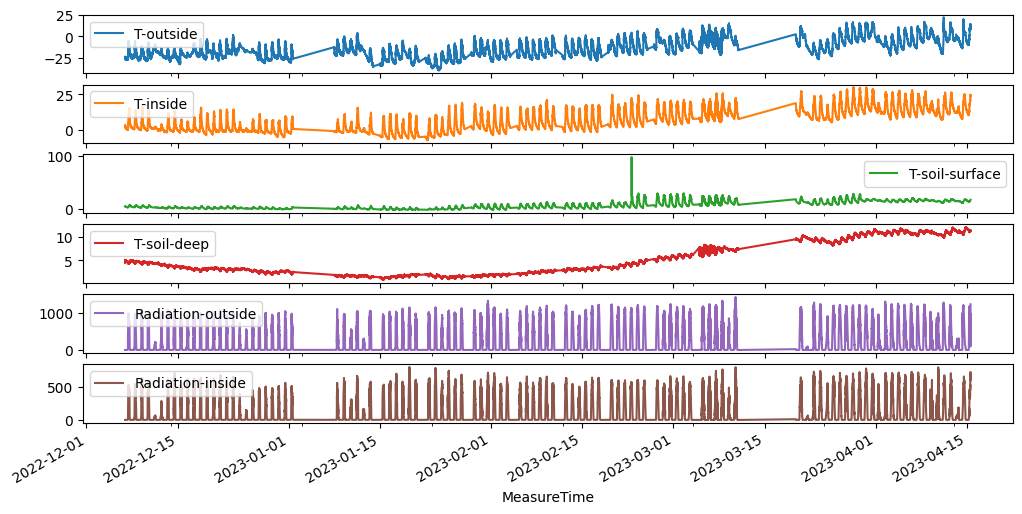

In [71]:
# Graphics chart
# new = old.filter(['A','B','D'], axis=1)
# new = old[['A', 'C', 'D']].copy()
energy = allPeriod[['MeasureTime', 'T-outside', 'T-inside', 'T-soil-surface', 'T-soil-deep','Radiation-outside', 'Radiation-inside']].copy()
energy = energy.set_index('MeasureTime')
# energy.plot()
plt.figure()
energy.plot(subplots=True, figsize=(12, 6)); plt.legend(loc='best')
plt.show()

In [97]:
# One day 
# nov8 = nov8.iloc[df['MeasureTime'] > '2022-11-10 12:00:00']
jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (jan8["MeasureTime"] <= '2023-01-12 00:00')]
jan8 = jan8.set_index('MeasureTime')
jan8.plot()
plt.show()
# nov8
# jan8

KeyError: 'MeasureTime'

In [13]:
# THERMAL BALANCE
# new = old[['A', 'C', 'D']].copy()
# Q = a*u*(t1-t2)
def supplyEnergy(a, tempInner, u):
    energy['thermalComfort'] = tempInner
    energy['requiredHeat'] = a * u * (tempInner - energy['T-outside'])
    energyBalance = energy.drop(columns=['Radiation-inside', 'Radiation-outside'])
    requiredHeat = energyBalance['requiredHeat'].sum()
    energyBalance.plot()
    plt.show()
    return requiredHeat



In [9]:
# DROP radiation
# widgets.interact(function, a=(min, max, interval))
widgets.interact(supplyEnergy, a=(1,100,0.5), tempInner=(1,30,1), u=(0.2, 10, 0.1) )
# supplyEnergy(50, 20, 5)

interactive(children=(FloatSlider(value=50.0, description='a', min=1.0, step=0.5), IntSlider(value=15, descrip…

<function __main__.supplyEnergy(a, tempInner, u)>

In [ ]:
drySoilDensity = 1220
wetSoilDensity = 1760
drySoilHcap = 800
wetSoilHcap = 1480
soilDensity = (drySoilDensity + wetSoilDensity)/2
soilHcap = (drySoilHcap + wetSoilHcap)/2

In [28]:
def changeInnerTemp(a, innerTempGoal, u):
    energy['innerTempGoal'] = innerTempGoal
    energy['Radiation-inside'] = energy['Radiation-inside'] / 100
    energy['Radiation-outside'] = energy['Radiation-outside'] / 100
    energy['neededHeat'] = a * u * (innerTempGoal - energy['T-outside'])
    # energy.drop(columns=['Radiation-inside', 'Radiation-outside'])
    energy.plot()
    plt.show()

In [29]:
# widgets.interact(function, a=(min, max, interval))
widgets.interact(changeInnerTemp, a=(1,100,0.5), innerTempGoal=(1
                                                                ,20000,2500), u=(0.2, 10, 0.1) )

ValueError: cannot find widget or abbreviation for argument: 'innerTempGoal'

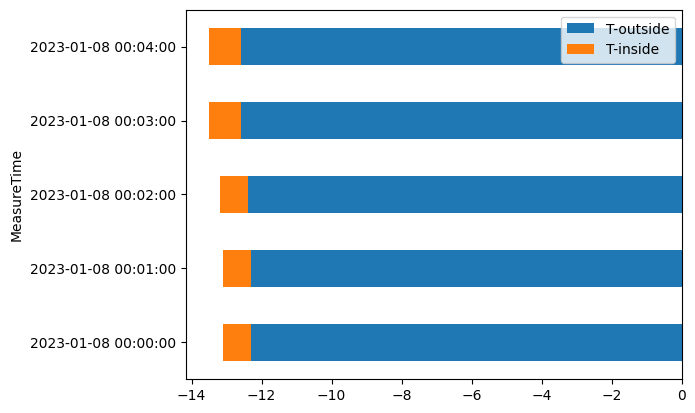

In [25]:
# ENERGY BALANCE
energy.head(5).plot(kind='barh', stacked=True);